<a href="https://colab.research.google.com/github/alirasouli1994/image-processing/blob/main/image_contrast_enhancement_T2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()
file_name = list(uploaded.keys())[0]

image = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)

Saving Fig3.10(b).jpg to Fig3.10(b).jpg


In [12]:
def picewise_linear_transform(image, r1, s1, r2, s2):


    lookup_table = np.zeros(256, dtype=np.uint8)

    for r in range(256):
        if r < r1 :
            lookup_table[r] = int((s1 /r1) * r)

        elif r < r2 :
            lookup_table[r] = int(((s2 - s1) / (r2 - r1)) * (r - r1) + s1)
        else:
            lookup_table[r] = int(((255 - s2) / (255 - r2)) * (r -r2) + s2)


    transformed_image = cv2.LUT(image, lookup_table)
    return transformed_image

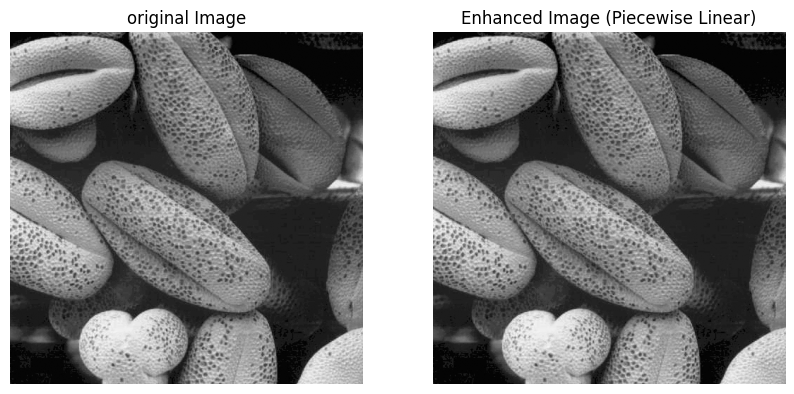

In [21]:
r1, s1 = 50, 30
r2, s2 = 200, 230

enhanced_image = picewise_linear_transform(image, r1, s1, r2, s2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image,cmap='gray')
plt.title('original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(enhanced_image, cmap= 'gray')
plt.title('Enhanced Image (Piecewise Linear)')
plt.axis('off')

plt.show()